<a href="https://colab.research.google.com/github/aquemi/digital_ocean/blob/main/Analysis_Source_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Minimum Requirements Section


Hello! This analysis is based on TWO different sets of files: **Waves** and **Tides** obtained from Digital Ocean. They are open data and are related to the sea around Ireland. As recommended, the period considered for this analysis is one year, 17/09/2021 to 17/09/2022. 



### Loading the data: 
I already uploaded the dataset we will use for this analysis to Github in order to make it easier to reproduce analysis. Now, let's load the data we used for this analysis from Github repository to our Google colab /tmp folder.

So, let's import libraries and then download the data from github:

First, let import useful libraries:

In [4]:
import zipfile
import pandas as pd
import datetime
import glob
import os
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error

This next code block downloads the dataset we will need from Github repository, unzips it, and extracts the contents into the /tmp folder here on Google Colab:

In [6]:
!wget --no-check-certificate \
    "https://github.com/aquemi/digital_ocean/archive/refs/heads/main.zip" \
    -O "/tmp/waves_tides.zip"

zip_ref = zipfile.ZipFile('/tmp/waves_tides.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

--2022-09-21 13:23:19--  https://github.com/aquemi/digital_ocean/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/aquemi/digital_ocean/zip/refs/heads/main [following]
--2022-09-21 13:23:19--  https://codeload.github.com/aquemi/digital_ocean/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/waves_tides.zip’

/tmp/waves_tides.zi     [          <=>       ]  11.08M  4.66MB/s    in 2.4s    

2022-09-21 13:23:22 (4.66 MB/s) - ‘/tmp/waves_tides.zip’ saved [11617599]



Great! Now that our zip contents have been extracted into /tmp folder, we need the path of the dataset relative to the Google Colab notebook we are working on. Click on folder icon then file system to reveal all the folders of the virtual system.


 Please check you /tmp folder and you might have two directories, named tides and waves. Tides has 14 files and waves 6 files, all in .csv format.

In [11]:
dir_tide = '/tmp/digital_ocean-main/tides'
dir_waves = '/tmp/digital_ocean-main/waves'

In [25]:
list_wave = os.listdir(dir_waves) #list all paths in wave directory
print('Wave directory has', len(list_wave),'files:', list_wave)
list_tide = os.listdir(dir_tide) #list all paths in tide directory
print('Tide directory has', len(list_tide),'files:', list_tide)


Wave directory has 6 files: ['Clew_Bay.csv', 'SmartBay_Wave_Buoy.csv', 'AMETS_Berth_A_Wave_Buoy.csv', 'Bantry_Bay.csv', 'Brandon_Bay.csv', 'AMETS_Berth_B_Wave_Buoy.csv']
Tide directory has 14 files: ['Dublin Port.csv', 'Castletownbere_Port.csv', 'Howth_Water_Level_1.csv', 'Wexford_Harbour.csv', 'Kinvara_Unreferenced.csv', 'Roonagh_Pier.csv', 'Skerries_Harbour.csv', 'Ballycotton_Harbour.csv', 'Killybegs_Port.csv', 'Union_Hall_Harbor.csv', 'Ballyglass_Harbour.csv', 'Galway_Port.csv', 'Dingle_Harbour.csv', 'Aranmore_Island_Leabgarrow.csv']


### Explorational Data Analysis
This is an important step to explore and gain insight about our dataset.

Let's load just one sheet from Wave directory to get some information about the data.

In [19]:
# reads the AMETS Berth A Wave Buoy table.
AMETS_A = pd.read_csv('/tmp/digital_ocean-main/waves/AMETS_Berth_A_Wave_Buoy.csv')

Now, let's check the first three rows from this table:

In [20]:
# displays 3 rows of our table.
AMETS_A.head(3)

,longitude,latitude,time,station_id,PeakPeriod,PeakDirection,UpcrossPeriod,SignificantWaveHeight,Hmax,SeaTemperature,MeanCurSpeed,MeanCurDirTo
0,degrees_east,degrees_north,UTC,NaN,s,degrees_true,s,cm,cm,degree_C,m/s,degrees_true
1,-10.29737,54.2753,2021-09-17T23:22:00Z,AMETS Berth A Wave Buoy,9.09,265.8,7.143,244.0,NaN,16.25,NaN,NaN
2,-10.29737,54.2753,2021-09-17T23:52:00Z,AMETS Berth A Wave Buoy,10.53,257.3,7.273,253.0,NaN,16.25,NaN,NaN


We can see all the data types from each collumn and non-null rows:

In [21]:
# displays more information about data types and quantity of entries presented in this table.
AMETS_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16772 entries, 0 to 16771
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   longitude              16772 non-null  object
 1   latitude               16772 non-null  object
 2   time                   16772 non-null  object
 3   station_id             16771 non-null  object
 4   PeakPeriod             16772 non-null  object
 5   PeakDirection          16772 non-null  object
 6   UpcrossPeriod          16772 non-null  object
 7   SignificantWaveHeight  16772 non-null  object
 8   Hmax                   1 non-null      object
 9   SeaTemperature         16772 non-null  object
 10  MeanCurSpeed           1 non-null      object
 11  MeanCurDirTo           1 non-null      object
dtypes: object(12)
memory usage: 1.5+ MB


This table comprises of 16.772 observations and 12 characteristics.

Ok! Let's use our first question to guide our analysis. 
 
1. What is the lowest temperature of each one of the Bouys? and a. Which usually month it occurs?

Accessing the **Waves** dataset we can obtain several parameters, included the **Sea Temperature** which is our interest. So, using the Digital Ocean website we can download a csv file that contains information for each Buoy.

Before extracting information about the Sea Temperature we should take a very important step, which is load all similar data and preparate it for analysis. 

We have just looked to one of six Buoys available. In order to know the lowest sea temperature of each bouy we should concatenate all the tables that has the same collumns in one dataframe, which are located in our **Waves** directory. 
First, we need a list of paths from each file located in the directory.

We alrealdy loaded the data to our /tmp directory, now let's read each file contained on wave directory. We need the entire path from each file, let's assign them to a variable **list_wave_paths**.

In [26]:
dir_waves = '/tmp/digital_ocean-main/waves' # path which contains all waves files
list_wave_paths = glob.glob(os.path.join(dir_waves, "*.csv")) #list all paths in wave directory
print(list_wave_paths)


['/tmp/digital_ocean-main/waves/Clew_Bay.csv', '/tmp/digital_ocean-main/waves/SmartBay_Wave_Buoy.csv', '/tmp/digital_ocean-main/waves/AMETS_Berth_A_Wave_Buoy.csv', '/tmp/digital_ocean-main/waves/Bantry_Bay.csv', '/tmp/digital_ocean-main/waves/Brandon_Bay.csv', '/tmp/digital_ocean-main/waves/AMETS_Berth_B_Wave_Buoy.csv']


As we can see, the list_wave_paths has the paths from each buoy location.

Each file has the same collumns, then we can read it and concatenate each one in only one dataframe named **dfs_concat_wave**. 

In [27]:
wave_dfs = (pd.read_csv(f) for f in list_wave_paths) #read each file in the list_wave_paths
dfs_concat_wave = pd.concat(wave_dfs, ignore_index=True) #concatenates the dataframes

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:348: DtypeWarning: Columns (0,1,4,5,6,7,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  objs = list(objs)
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:348: DtypeWarning: Columns (0,1,4,5,6,7,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  objs = list(objs)


Nice! Now we can see that we have more rows than ever: 249.808 observations and 12 collumns! All data types are object and there are some rows with null values.

In [14]:
dfs_concat_wave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249808 entries, 0 to 249807
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   longitude              249808 non-null  object
 1   latitude               249808 non-null  object
 2   time                   249808 non-null  object
 3   station_id             249802 non-null  object
 4   PeakPeriod             77381 non-null   object
 5   PeakDirection          77381 non-null   object
 6   UpcrossPeriod          77381 non-null   object
 7   SignificantWaveHeight  77381 non-null   object
 8   Hmax                   34456 non-null   object
 9   SeaTemperature         249808 non-null  object
 10  MeanCurSpeed           52605 non-null   object
 11  MeanCurDirTo           52602 non-null   object
dtypes: object(12)
memory usage: 22.9+ MB


### Our first question: 1. What is the lowest temperature of each one of the Bouys? and a. Which usually month it occurs?

Now we have all files in one dataframe. We need three columns from **dfs_concat_wave** to answer the **1.** and **a.** questions: **station_id**, **sea temperature** and **month**. Each name of the buoy is indexed in **station_id** collumn and the month might be obtained from **time** after some data transformations. 

Let's get these collumns to explore more about sea temperature. 

In [29]:
dfs_concat_wave[['SeaTemperature','time','station_id']]

,SeaTemperature,time,station_id
0,degree_C,UTC,NaN
1,13.3,2021-10-30T00:03:00Z,Clew Bay
2,13.3,2021-10-30T00:33:00Z,Clew Bay
3,13.25,2021-10-30T01:03:00Z,Clew Bay
4,13.25,2021-10-30T01:33:00Z,Clew Bay
...,...,...,...
249803,15.2,2022-09-05T21:32:00Z,AMETS Berth B Wave Buoy
249804,15.2,2022-09-05T22:02:00Z,AMETS Berth B Wave Buoy
249805,15.2,2022-09-05T22:32:00Z,AMETS Berth B Wave Buoy
249806,15.2,2022-09-05T23:02:00Z,AMETS Berth B Wave Buoy


We can observe that the first row of the Sea Temperature collumn from each csv file previously concatenated has string values mixed with numeric data. In order to get around this problem and obtain only numeric data from the sea temperature collumn we need to transform the data from object to float type, as follows:


In [30]:
dfs_concat_wave = dfs_concat_wave[pd.to_numeric(dfs_concat_wave['SeaTemperature'], errors='coerce').notnull()]
dfs_concat_wave['SeaTemperature'] = dfs_concat_wave['SeaTemperature'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Note that the data type now is float and we removed 6 rows that contained string values instead numeric.

In [31]:
dfs_concat_wave['SeaTemperature']

1         13.30
2         13.30
3         13.25
4         13.25
5         13.20
          ...  
249803    15.20
249804    15.20
249805    15.20
249806    15.20
249807    15.20
Name: SeaTemperature, Length: 249802, dtype: float64

In order to get the lowest temperature for each buoy, we need to get the lowest sea temperature index and group by station_id. Let's do it:

In [32]:
min_sea_temperature = dfs_concat_wave.loc[dfs_concat_wave.groupby('station_id').SeaTemperature.idxmin()]

Now we already have all the information we needed to answer 1 and a questions:

In [33]:
min_sea_temperature[['station_id','SeaTemperature','time']]

,station_id,SeaTemperature,time
88405,AMETS Berth A Wave Buoy,8.55,2022-03-26T08:04:00Z
241983,AMETS Berth B Wave Buoy,8.15,2022-03-26T05:02:00Z
145608,Bantry Bay,5.27,2022-03-14T08:45:00Z
233245,Brandon Bay,4.47,2022-03-03T23:15:00Z
5073,Clew Bay,7.50,2022-03-01T09:03:00Z
44570,SmartBay Wave Buoy,5.31,2022-01-17T04:45:00Z


We can plot this in a graph for better visualization, as follows:

Text(0.0, 1.0, 'The lowest temperature of each one of the Bouys for the period 17/09/2021 ~ 17/09/2022')

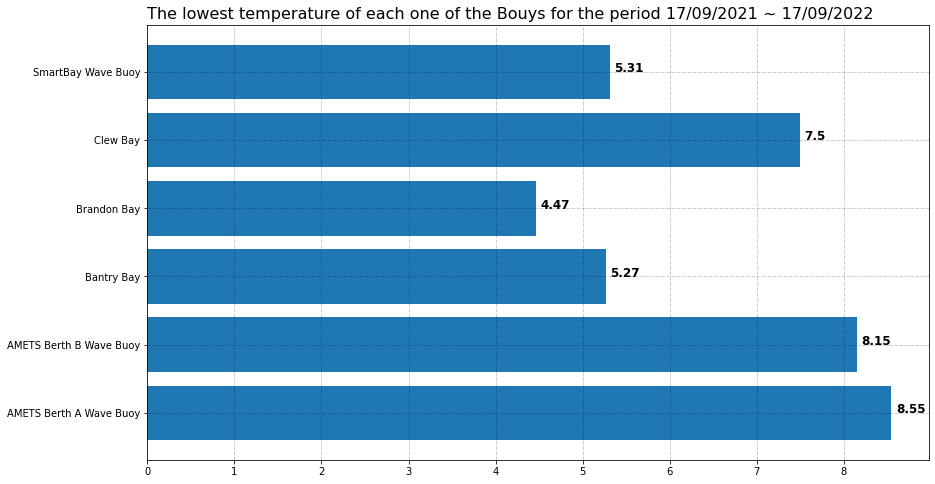

In [34]:
from matplotlib import pyplot as plt
# Figure Size
fig, ax = plt.subplots(figsize =(14, 8))

# Horizontal Bar Plot
ax.barh(min_sea_temperature['station_id'].values, min_sea_temperature['SeaTemperature'].values)

# Add x, y gridlines
ax.grid(b = True, color ='black',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.4,)
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.05, i.get_y()+0.4,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight ='bold',
             color ='black')
 
# Add Plot Title
ax.set_title('The lowest temperature of each one of the Bouys for the period 17/09/2021 ~ 17/09/2022',
             loc ='left', fontsize = 16 )


Okay, we already can see which month the lowest sea temperature usually occurs: 

In [35]:
min_sea_temperature['time']

88405     2022-03-26T08:04:00Z
241983    2022-03-26T05:02:00Z
145608    2022-03-14T08:45:00Z
233245    2022-03-03T23:15:00Z
5073      2022-03-01T09:03:00Z
44570     2022-01-17T04:45:00Z
Name: time, dtype: object

Considering that we could have a large dataset let's plot an graph for better visualization. For this, we can use datetime method from pandas to exclude the time information and only get the information about the month. 

In [36]:
min_sea_temperature['time'] = pd.to_datetime(min_sea_temperature['time']).dt.month

In [37]:
min_sea_temperature['time']

88405     3
241983    3
145608    3
233245    3
5073      3
44570     1
Name: time, dtype: int64

Then we plot a histogram to get the month distribution which occurs the lowest temperature.

Text(0, 0.5, 'Frequency')

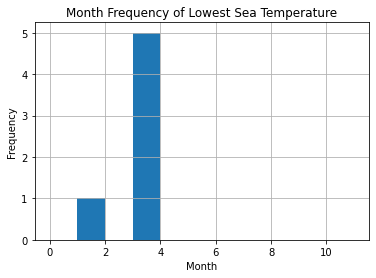

In [38]:
min_sea_temperature['time'].hist(bins=range(0,12))
plt.title('Month Frequency of Lowest Sea Temperature')
plt.xlabel('Month')
plt.ylabel('Frequency')

As we can see from the histogram above, the lowest sea temperature occurs on January for SmartBay Wave buoy and on March for the others buoys. 

Let's go for our second question!

### 2. Where (lat/long) do we have the biggest water level? and a. Which usually month it occurs?

Well, there is no information about water level on Waves dataset. So, let's check on Tides and explore this new set together.

First we do the same we did before. We need to read all csv data located on **dir_tide**:

In [39]:
dir_tide = '/tmp/digital_ocean-main/tides'
list_tide_paths = glob.glob(os.path.join(dir_tide, "*.csv")) #list all paths in tide directory
print(list_tide_paths)

['/tmp/digital_ocean-main/tides/Dublin Port.csv', '/tmp/digital_ocean-main/tides/Castletownbere_Port.csv', '/tmp/digital_ocean-main/tides/Howth_Water_Level_1.csv', '/tmp/digital_ocean-main/tides/Wexford_Harbour.csv', '/tmp/digital_ocean-main/tides/Kinvara_Unreferenced.csv', '/tmp/digital_ocean-main/tides/Roonagh_Pier.csv', '/tmp/digital_ocean-main/tides/Skerries_Harbour.csv', '/tmp/digital_ocean-main/tides/Ballycotton_Harbour.csv', '/tmp/digital_ocean-main/tides/Killybegs_Port.csv', '/tmp/digital_ocean-main/tides/Union_Hall_Harbor.csv', '/tmp/digital_ocean-main/tides/Ballyglass_Harbour.csv', '/tmp/digital_ocean-main/tides/Galway_Port.csv', '/tmp/digital_ocean-main/tides/Dingle_Harbour.csv', '/tmp/digital_ocean-main/tides/Aranmore_Island_Leabgarrow.csv']


Next, we read all files and concatenates them in only one dataframe named **dfs_tide_concat**.


In [40]:
tide_dfs = (pd.read_csv(f) for f in list_tide_paths) #read all csvs 
dfs_tide_concat = pd.concat(tide_dfs, ignore_index=True) #concatenates the dataframes

In [41]:
dfs_tide_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265690 entries, 0 to 1265689
Data columns (total 7 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   time                  1265690 non-null  object 
 1   station_id            1265676 non-null  object 
 2   latitude              1265690 non-null  object 
 3   longitude             1265690 non-null  object 
 4   Water_Level_LAT       1020383 non-null  object 
 5   Water_Level_OD_Malin  1265690 non-null  object 
 6   QC_Flag               1265676 non-null  float64
dtypes: float64(1), object(6)
memory usage: 67.6+ MB


The dataset comprises 1.265.690 entries and 7 columns. We have 6 object and 1 float data type. 

Nice! We can notice that in this set we have data about Water Level in LAT, which is The Lowest Astronomical Tide, an internationally standardised reference size for measuring the depth of water and to define the coastal line in sea charts.

First let assign to **biggest_water_level** all rows that are not null values. 

In [42]:
biggest_water_level = dfs_tide_concat.dropna() #method removes the rows that contains NULL values

In [43]:
biggest_water_level.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020369 entries, 1 to 1265689
Data columns (total 7 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   time                  1020369 non-null  object 
 1   station_id            1020369 non-null  object 
 2   latitude              1020369 non-null  object 
 3   longitude             1020369 non-null  object 
 4   Water_Level_LAT       1020369 non-null  object 
 5   Water_Level_OD_Malin  1020369 non-null  object 
 6   QC_Flag               1020369 non-null  float64
dtypes: float64(1), object(6)
memory usage: 62.3+ MB


Ok, now we have 1.020.369 non-null entries!

We need to transform the Water_Level_LAT collumn to float data type, as follows: 

In [44]:
biggest_water_level['Water_Level_LAT'] = biggest_water_level['Water_Level_LAT'].astype(float) #transforms data into float

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
biggest_water_level.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020369 entries, 1 to 1265689
Data columns (total 7 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   time                  1020369 non-null  object 
 1   station_id            1020369 non-null  object 
 2   latitude              1020369 non-null  object 
 3   longitude             1020369 non-null  object 
 4   Water_Level_LAT       1020369 non-null  float64
 5   Water_Level_OD_Malin  1020369 non-null  object 
 6   QC_Flag               1020369 non-null  float64
dtypes: float64(2), object(5)
memory usage: 62.3+ MB


Now we can satisfy our curiosity about where the biggest water level occured by getting the index of the max value from **Water_Level_Lat** collumn:

In [46]:
biggest_water_level.loc[[biggest_water_level['Water_Level_LAT'].idxmax()]]

,time,station_id,latitude,longitude,Water_Level_LAT,Water_Level_OD_Malin,QC_Flag
988732,2021-12-07T07:30:00Z,Galway Port,53.269,-9.048,6.143,3.176,1.0


The latitude and the longitude are (53.269,-9.048) and corresponds to the Galway Port.

Answering the question *2.a. Which usually month it occurs?* 
There is only one possible month for the biggest water level considering one year, which is December as we can see in the row above. 

Let's go to the third question!

### 3. How the Wave Lenghts correlates with Sea Temperature?


After checking both sets available, there is no direct measure of wave length. For this analysis I assume **Wave Lenght** is related to the **Significant Wave Height** and **Maximum Wave Height** from the **Waves** dataset. 

Let's explore **Significant Wave Height**, **Sea Temperature** and **Maximum Wave Height**:

In [68]:
wave_temp = pd.DataFrame({ 'SigWaveHeight': dfs_concat_wave['SignificantWaveHeight'] , 'Temp' : dfs_concat_wave['SeaTemperature'], 'MaxWave' : dfs_concat_wave['Hmax']  })
wave_temp

,SigWaveHeight,Temp,MaxWave
1,85.0,13.30,NaN
2,86.0,13.30,NaN
3,84.0,13.25,NaN
4,80.0,13.25,NaN
5,74.0,13.20,NaN
...,...,...,...
249803,112.0,15.20,NaN
249804,123.0,15.20,NaN
249805,123.0,15.20,NaN
249806,140.0,15.20,NaN


We can see above that we have a lot of NaN values, we shoud remove them for our analysis, as follows:

In [49]:
wave_temp = wave_temp.dropna()
wave_temp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34449 entries, 8107 to 233320
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SigWaveHeight  34449 non-null  object 
 1   Temp           34449 non-null  float64
 2   MaxWave        34449 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


Ok, we notice that there are 34.449 non-null values, 2 objects and 1 float data types.

We need to transform both objects into float data type as we did with SeaTemperature.

In [50]:
wave_temp['SigWaveHeight'] = wave_temp['SigWaveHeight'].astype(float)
wave_temp['MaxWave'] = wave_temp['MaxWave'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
wave_temp.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34449 entries, 8107 to 233320
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SigWaveHeight  34449 non-null  float64
 1   Temp           34449 non-null  float64
 2   MaxWave        34449 non-null  float64
dtypes: float64(3)
memory usage: 1.1 MB


Great! Now we have all collumns in float data type, so all entries are valid!

In oder to obtain insight about the correlation between wave lenght and sea temperature let's plot them together.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


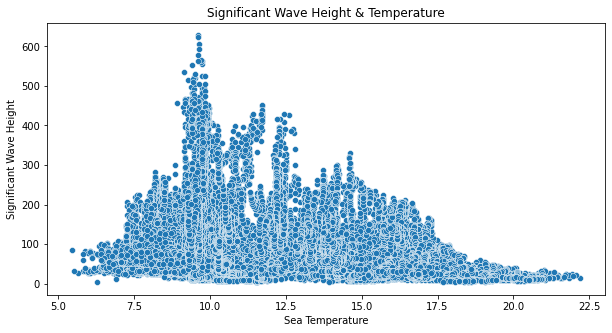

In [37]:
import seaborn as sns 
plt.figure(figsize=(10,5))
plt.title('Significant Wave Height & Temperature')
plt.ylabel('Significant Wave Height')
plt.xlabel('Sea Temperature')
sns.scatterplot(wave_temp['Temp'],wave_temp['SigWaveHeight'])
plt.show()


We can see that there is no visible pattern that we can affirm that both variables are **linear** correlated. We can see in the scatter plot that the most significant wave height are concentrated around 10°C degree and then it decreases as the sea temperature increases.

A scatterplot displays the strength, direction, and form of the relationship between two quantitative variables. We are considering for this the Significant Wave Height and the Sea Temperature variables. 

A correlation coefficient measures the strength of that relationship. Let's calculate a Pearson correlation coefficient for the variables:

In [52]:
wave_temp.corr()

,SigWaveHeight,Temp,MaxWave
SigWaveHeight,1.000000,-0.282879,0.988094
Temp,-0.282879,1.000000,-0.278851
MaxWave,0.988094,-0.278851,1.000000


The correlation between Significant Wave Height and Temperature is -0.28 for Maximum Wave Height and Temperature is -0.27.


We can see that both correlations returned a low coeficient between the wave lenght and sea temperature, as we expected. Considering the scatter plot we can assume that they are not linear correlated.

Let's go to the next question!

### 3.a. It is possible to predict with accuracy the Wave Lenght, based on the Sea Temperature and the Bouy location?

Let's explore the variables to shed light on this question.

In [187]:
wave_length = pd.DataFrame({ 'SigWaveHeight': dfs_concat_wave['SignificantWaveHeight'] , 'Temp' : dfs_concat_wave['SeaTemperature'], 'Latitude' : dfs_concat_wave['latitude'], 'Longitude' : dfs_concat_wave['longitude']  })

In [188]:
wave_length.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249802 entries, 1 to 249807
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SigWaveHeight  77375 non-null   object 
 1   Temp           249802 non-null  float64
 2   Latitude       249802 non-null  object 
 3   Longitude      249802 non-null  object 
dtypes: float64(1), object(3)
memory usage: 17.6+ MB


Let's transform the object to float data type and remove all null values:

In [189]:
wave_length['Latitude'] = wave_length['Latitude'].astype(float)
wave_length['SigWaveHeight'] = wave_length['SigWaveHeight'].astype(float)
wave_length['Longitude'] = wave_length['Longitude'].astype(float)
wave_length = wave_length.dropna()

In [190]:
wave_length.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77375 entries, 1 to 249807
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SigWaveHeight  77375 non-null  float64
 1   Temp           77375 non-null  float64
 2   Latitude       77375 non-null  float64
 3   Longitude      77375 non-null  float64
dtypes: float64(4)
memory usage: 3.0 MB


Let's plot the distribution for Wave Lenght, which we are considering as Significant Wave Height variable. And also the Sea Temperature distribution.

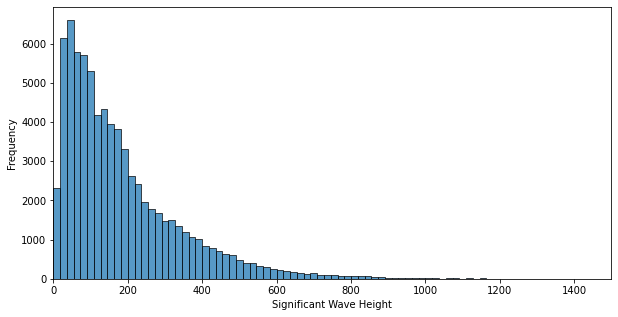

In [262]:
plt.figure(figsize=(10,5))
plt.xlim(0,1500)
plt.xlabel('Significant Wave Height')
plt.ylabel('Frequency')
sns.histplot(wave_length['SigWaveHeight'],bins=100)
plt.show()

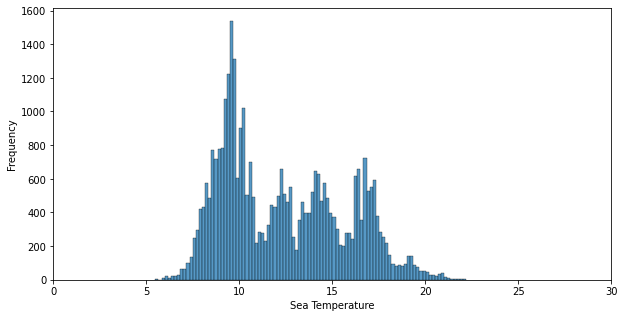

In [263]:
plt.figure(figsize=(10,5))
plt.xlim(0,30)
plt.xlabel('Sea Temperature')
plt.ylabel('Frequency')
sns.histplot(wave_temp['Temp'],bins=100)
plt.show()


The histogram gives us a good overview of the data. At a glance, we can see that both data clearly are not normally distributed. The Sea Temperature is left skewed. The peak is around 10°C degree for Sea Temperature. 
The Significant Wave Heigth distribution is also not normal and left skewed and extends further into the lower values than to the higher values. 

To explore a little further the data distribution, let's see the boxplot for SigWaveHeight variable:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


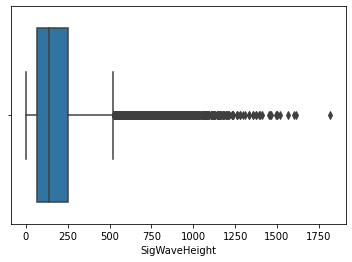

In [226]:
sns.boxplot(wave_length['SigWaveHeight'])

Let's plot 3D scatter plot to gain more insight about the problem:

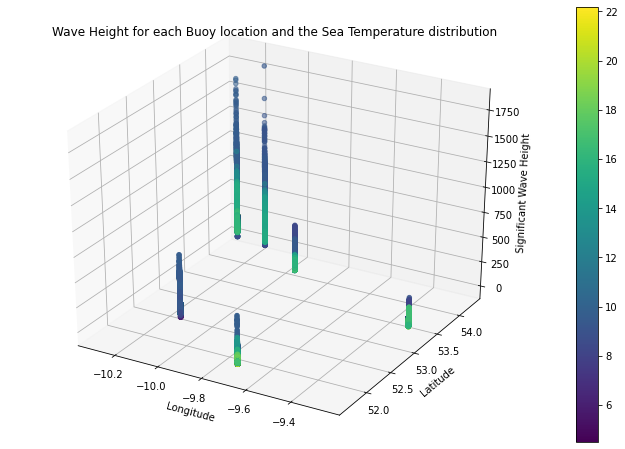

In [195]:
fig = plt.figure(figsize=(12,8))
temp_labels = wave_length['Temp']

ax = fig.add_subplot(111, projection='3d')
#ax.scatter(xs = wave_length['Longitude'], ys = wave_length['Latitude'], zs = wave_length['SigWaveHeight'], c=temp_labels)
ax.set_title("Significant Wave Height for each Buoy location and the Sea Temperature distribution")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("Significant Wave Height")
scat_plot = ax.scatter(xs = wave_length['Longitude'], ys = wave_length['Latitude'], zs = wave_length['SigWaveHeight'], c=temp_labels)
cb = plt.colorbar(scat_plot)

plt.show()

Considering there is a lot of outliers, let's remove then and normalize the data.

In [228]:
out_wave_length = wave_length.copy()
out_wave_length = out_wave_length[(np.abs(stats.zscore(out_wave_length['SigWaveHeight'])) < 3)]

In [232]:
wave_length.describe()

,SigWaveHeight,Temp,Latitude,Longitude
count,77375.000000,77375.000000,77375.000000,77375.000000
mean,184.637260,12.128287,53.331854,-9.918349
std,162.059001,2.834004,1.033499,0.349141
min,0.000000,4.510000,51.647000,-10.297370
25%,68.000000,9.650000,52.282333,-10.150990
50%,139.000000,11.850000,53.801353,-10.094833
75%,250.000000,14.300000,54.225100,-9.681000
max,1819.000000,22.180000,54.275300,-9.262278


The maximum value for SigWaveHeight was 1819 and now is 670.

In [229]:
out_wave_length.describe()

,SigWaveHeight,Temp,Latitude,Longitude
count,76026.000000,76026.000000,76026.000000,76026.000000
mean,173.357259,12.164791,53.315428,-9.912542
std,138.002325,2.843380,1.035175,0.349344
min,0.000000,4.510000,51.647000,-10.297370
25%,67.000000,9.650000,52.282333,-10.150990
50%,136.000000,11.940000,53.801353,-10.094833
75%,241.000000,14.350000,54.225100,-9.681000
max,670.000000,22.180000,54.275300,-9.262278


Let's see the 3D plot without the outliers:

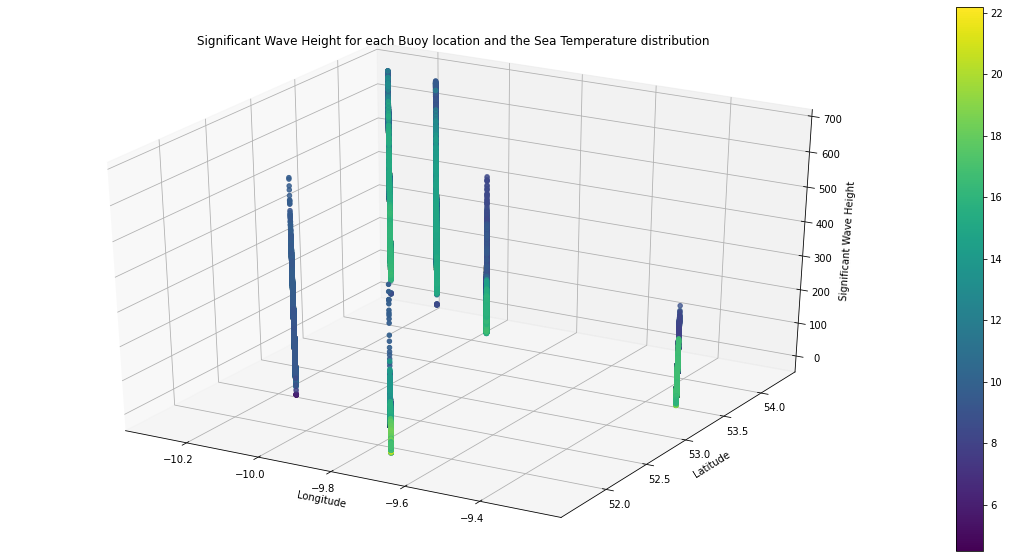

In [240]:
fig = plt.figure(figsize=(20,10))
temp_labels = out_wave_length['Temp']

ax = fig.add_subplot(111, projection='3d')
#ax.scatter(xs = wave_length['Longitude'], ys = wave_length['Latitude'], zs = wave_length['SigWaveHeight'], c=temp_labels)
ax.set_title("Significant Wave Height for each Buoy location and the Sea Temperature distribution")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("Significant Wave Height")
scat_plot = ax.scatter(xs = out_wave_length['Longitude'], ys = out_wave_length['Latitude'], zs = out_wave_length['SigWaveHeight'], c=temp_labels)
cb = plt.colorbar(scat_plot)

plt.show()

We can notice an interesting pattern in the graph. We can observe that the Wave Height increases as the longitude gets closer to -10.2 from -9.4 and the latitude gets closer to 54. It suggests that higher waves are expected to occur in these buoys.



We can relate the latitude and longitude with the Buoy Location, as we can see in the table:

In [63]:
min_sea_temperature[['station_id','latitude','longitude']]

,station_id,latitude,longitude
88405,AMETS Berth A Wave Buoy,54.2753,-10.29737
241983,AMETS Berth B Wave Buoy,54.2251,-10.15099
145608,Bantry Bay,51.647,-9.681
233245,Brandon Bay,52.282333,-10.094833
5073,Clew Bay,53.801353,-9.911498
44570,SmartBay Wave Buoy,53.228333,-9.262278


We can also observe that the sea temperature distribution is similar for AMETS Berth A Wave and AMETS Berth B Wave Buoys and both comprises Significant Wave Heights higher values. 

Brandon Bay Sea Temperature has waves that has low variation in temperature, which is around 12°C degree during the year.

The Bantry Bay, Clew Bay and SmartBay has similar distribution of wave lenghts and sea temperature. 

Linear regression and multiple regression assumes that the probability distribution of each variable is well behaved, such as a Gaussian distribution. We observed that our data do not follow a normal distribution, so we might not find a good fit using it. 
So, since most biological phenomena are nonlinear in nature, we might be able to predict the wave length using a polynomial regression model.

First let's build our X and y variables from the data previously prepared.

In [242]:
from sklearn.linear_model import LinearRegression

X = out_wave_length[['Latitude','Longitude','Temp']]
y = out_wave_length[['SigWaveHeight']]

Let's split our data in train (70%) and test (30%) and set a seed to guarantee that the split is always the same.

In [243]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

We create the new polynomial features and apply to our data (X).

In [244]:
poly = PolynomialFeatures(degree=4, include_bias=False)
poly_features = poly.fit_transform(X)


Now let’s create and fit our model, we’ll train our model only on the training data:

In [220]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression()

The reason for us training our model only on the training data is that later we want to see how well our model will predict responses based on feature values it hasn’t seen before.

Let's see the prediction for our test set and the results:

In [221]:
poly_reg_y_predicted = poly_reg_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
r2_test = r2_score(y_test, poly_reg_y_predicted)

In [223]:
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

The model performance for the test set
-------------------------------------------
RMSE of test set is 93.06678833474446
R2 score of test set is 0.5412572318960638


We take the square root of mean_squared_error to get the RMSE (root mean square error) which is a commonly used metric to evaluate a machine learning model’s performance. RMSE shows how far the values your model predicts (poly_reg_y_predicted) are from the true values (y_test), on average. Roughly speaking: the smaller the RMSE, the better the model.

It is important to know how well the relationship between the values of the x-and y-axis is, if there are no relationship the polynomial regression can not be used to predict anything.

The relationship is measured with a value called the r-squared.

The r-squared value ranges from 0 to 1, where 0 means no relationship, and 1 means 100% related. The 0.54 indicates not a good fitting and 46% of the variability in the outcome data cannot be explained by the model.

Further analysis is worth of attention to elucidate more insigths. Thank you for your attention. Cheers! 